In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [13]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [15]:
# Save the input and target variables
print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [17]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis = 0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [18]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size= 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [19]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

model = get_model()

In [20]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [21]:
# Compile the model
model.compile(optimizer="adam", loss="mae", metrics=["mae"])


In [22]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose = 2)


Epoch 1/100
6/6 - 1s - loss: 0.8515 - mae: 0.8515 - val_loss: 0.8609 - val_mae: 0.8609 - 899ms/epoch - 150ms/step
Epoch 2/100
6/6 - 0s - loss: 0.8205 - mae: 0.8205 - val_loss: 0.7977 - val_mae: 0.7977 - 54ms/epoch - 9ms/step
Epoch 3/100
6/6 - 0s - loss: 0.7346 - mae: 0.7346 - val_loss: 0.6679 - val_mae: 0.6679 - 55ms/epoch - 9ms/step
Epoch 4/100
6/6 - 0s - loss: 0.6176 - mae: 0.6176 - val_loss: 0.5773 - val_mae: 0.5773 - 57ms/epoch - 9ms/step
Epoch 5/100
6/6 - 0s - loss: 0.5731 - mae: 0.5731 - val_loss: 0.5641 - val_mae: 0.5641 - 56ms/epoch - 9ms/step
Epoch 6/100
6/6 - 0s - loss: 0.5561 - mae: 0.5561 - val_loss: 0.6061 - val_mae: 0.6061 - 56ms/epoch - 9ms/step
Epoch 7/100
6/6 - 0s - loss: 0.5477 - mae: 0.5477 - val_loss: 0.5794 - val_mae: 0.5794 - 54ms/epoch - 9ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5360 - mae: 0.5360 - val_loss: 0.5842 - val_mae: 0.5842 - 52ms/epoch - 9ms/step
Epoch 9/100
6/6 - 0s - loss: 0.5239 - mae: 0.5239 - val_loss: 0.5608 - val_mae: 0.5608 - 55ms/epoch - 9ms/ste

6/6 - 0s - loss: 0.3059 - mae: 0.3059 - val_loss: 0.6092 - val_mae: 0.6092 - 53ms/epoch - 9ms/step
Epoch 75/100
6/6 - 0s - loss: 0.3058 - mae: 0.3058 - val_loss: 0.6629 - val_mae: 0.6629 - 55ms/epoch - 9ms/step
Epoch 76/100
6/6 - 0s - loss: 0.3092 - mae: 0.3092 - val_loss: 0.7077 - val_mae: 0.7077 - 55ms/epoch - 9ms/step
Epoch 77/100
6/6 - 0s - loss: 0.3281 - mae: 0.3281 - val_loss: 0.5852 - val_mae: 0.5852 - 55ms/epoch - 9ms/step
Epoch 78/100
6/6 - 0s - loss: 0.3132 - mae: 0.3132 - val_loss: 0.5730 - val_mae: 0.5730 - 53ms/epoch - 9ms/step
Epoch 79/100
6/6 - 0s - loss: 0.3186 - mae: 0.3186 - val_loss: 0.6814 - val_mae: 0.6814 - 59ms/epoch - 10ms/step
Epoch 80/100
6/6 - 0s - loss: 0.2858 - mae: 0.2858 - val_loss: 0.6226 - val_mae: 0.6226 - 57ms/epoch - 10ms/step
Epoch 81/100
6/6 - 0s - loss: 0.2615 - mae: 0.2615 - val_loss: 0.5934 - val_mae: 0.5934 - 59ms/epoch - 10ms/step
Epoch 82/100
6/6 - 0s - loss: 0.2894 - mae: 0.2894 - val_loss: 0.5905 - val_mae: 0.5905 - 60ms/epoch - 10ms/step
E

In [23]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


2/2 - 0s - loss: 0.7117 - mae: 0.7117 - 30ms/epoch - 15ms/step


[0.7116574645042419, 0.7116574645042419]

#### Plot the learning curves

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

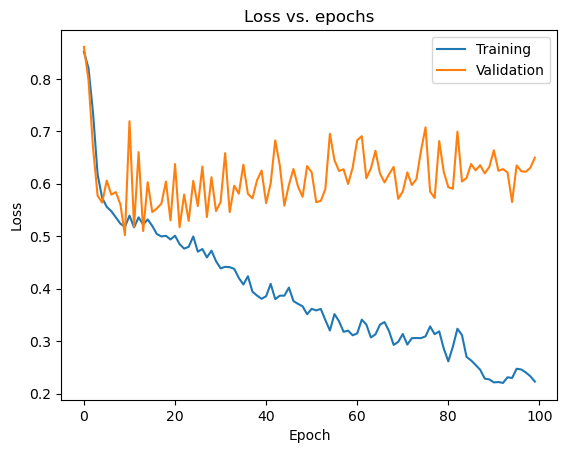

In [25]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

In [ ]:
# Re-build the model with weight decay and dropout layers



In [ ]:
# Compile the model



In [ ]:
# Train the model, with some of the data reserved for validation



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [ ]:
# Write a custom callback



In [ ]:
# Re-build the model



In [ ]:
# Compile the model



#### Train the model with the callback

In [ ]:
# Train the model, with some of the data reserved for validation



In [ ]:
# Evaluate the model



In [ ]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()